<a href="https://colab.research.google.com/github/atanasvasilevjourney/Data/blob/master/Bitcoin_Long_Term_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Analysis of BITCOIN Historical Data



Prophet by META:
 Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

ARIMA - Autoregressive Integrated Moving Average (ARIMA) model to forecast time series data. ARIMA is a popular method for time series forecasting

Loading Dataset from Kaggle

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from itertools import product
import warnings
from scipy import stats
import statsmodels.api as sm
from prophet import Prophet

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bitcoin-historical-data


In [3]:
dataset_path = "/kaggle/input/bitcoin-historical-data"
all_files = os.listdir(dataset_path)
print("Files in the dataset directory:", all_files)

Files in the dataset directory: ['btcusd_1-min_data.csv']


In [4]:
csv_file = os.path.join(dataset_path, "btcusd_1-min_data.csv")

In [5]:
df_btc = pd.read_csv(csv_file)
df_btc.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


EDA


In [6]:
df_btc.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7.031246e+06,7.031246e+06,7.031246e+06,7.031246e+06,7.031246e+06,7.031246e+06
mean,1.536350e+09,1.764264e+04,1.764962e+04,1.763544e+04,1.764264e+04,5.289097e+00
std,1.217863e+08,2.442971e+04,2.443768e+04,2.442152e+04,2.442967e+04,2.248901e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.430881e+09,4.253500e+02,4.255300e+02,4.251300e+02,4.253500e+02,1.810181e-02
50%,1.536349e+09,6.627840e+03,6.631280e+03,6.623825e+03,6.627810e+03,4.656084e-01
75%,1.641818e+09,2.753200e+04,2.753900e+04,2.752600e+04,2.753200e+04,3.023259e+00
max,1.747356e+09,1.091110e+05,1.093560e+05,1.087940e+05,1.090360e+05,5.853852e+03


In [7]:
df_btc.shape

(7031246, 6)

In [8]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031246 entries, 0 to 7031245
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 321.9 MB


In [9]:
df_btc.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In Time Series Analysis - the most important thing is to have historical data in Time-series Format - datetime.

In [10]:
df_btc.Timestamp = pd.to_datetime(df_btc.Timestamp, unit='s')
df_btc.index = df_btc.Timestamp
df_btc.head()

,Timestamp,Open,High,Low,Close,Volume
Timestamp,,,,,,
2012-01-01 10:01:00,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:02:00,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:03:00,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:04:00,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:05:00,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [11]:
df_btc.tail()

,Timestamp,Open,High,Low,Close,Volume
Timestamp,,,,,,
2025-05-16 00:42:00,2025-05-16 00:42:00,104003.0,104005.0,103966.0,103966.0,0.002220
2025-05-16 00:43:00,2025-05-16 00:43:00,103967.0,103967.0,103967.0,103967.0,0.000200
2025-05-16 00:44:00,2025-05-16 00:44:00,103970.0,103972.0,103967.0,103971.0,0.387381
2025-05-16 00:45:00,2025-05-16 00:45:00,103993.0,104004.0,103950.0,104004.0,0.011107
2025-05-16 00:46:00,2025-05-16 00:46:00,103984.0,103984.0,103913.0,103924.0,0.682969


Time Series Indexing

In [12]:
btc = df_btc.copy()

In [13]:
btc = btc.rename(columns={'Timestamp': 'Date Time'})

In [14]:
btc.head()

,Date Time,Open,High,Low,Close,Volume
Timestamp,,,,,,
2012-01-01 10:01:00,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:02:00,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:03:00,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:04:00,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:05:00,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [15]:
btc.tail()

,Date Time,Open,High,Low,Close,Volume
Timestamp,,,,,,
2025-05-16 00:42:00,2025-05-16 00:42:00,104003.0,104005.0,103966.0,103966.0,0.002220
2025-05-16 00:43:00,2025-05-16 00:43:00,103967.0,103967.0,103967.0,103967.0,0.000200
2025-05-16 00:44:00,2025-05-16 00:44:00,103970.0,103972.0,103967.0,103971.0,0.387381
2025-05-16 00:45:00,2025-05-16 00:45:00,103993.0,104004.0,103950.0,104004.0,0.011107
2025-05-16 00:46:00,2025-05-16 00:46:00,103984.0,103984.0,103913.0,103924.0,0.682969


Checking if data is stationarity
Checking Stationarity DATA By visually inspecting the plot, we can check if the time series is stationary or not. A stationary time series has a consistent mean and variance over time, and does not show any trend or seasonality. If the plot shows a clear trend or seasonality, then we will need to make the time series stationary before building the ARIMA model.

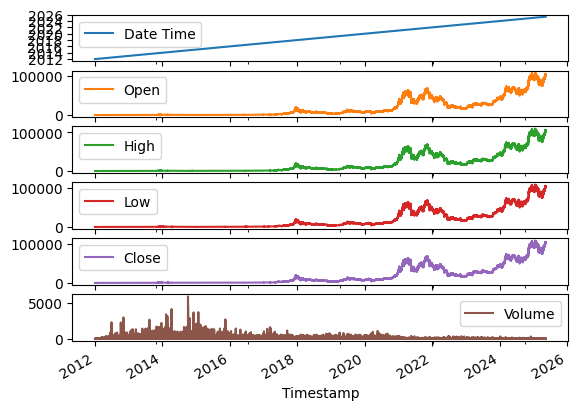

In [16]:
import matplotlib.pyplot as plt
btc.plot(subplots=True)
plt.show()

We can see from the above plots - our data is not stationary. we can clear visible uptrend movements in all columns and volatility in Volume. To perform ARIMA, we need to clear this trend:

Sampling the data

In [17]:
btc_daily = btc.resample('D').last()
btc_daily.head()

,Date Time,Open,High,Low,Close,Volume
Timestamp,,,,,,
2012-01-01,2012-01-01 23:59:00,4.84,4.84,4.84,4.84,0.0
2012-01-02,2012-01-02 23:59:00,5.00,5.00,5.00,5.00,0.0
2012-01-03,2012-01-03 23:59:00,5.29,5.29,5.29,5.29,0.0
2012-01-04,2012-01-04 23:59:00,5.57,5.57,5.57,5.57,0.0
2012-01-05,2012-01-05 23:59:00,6.42,6.42,6.42,6.42,0.0


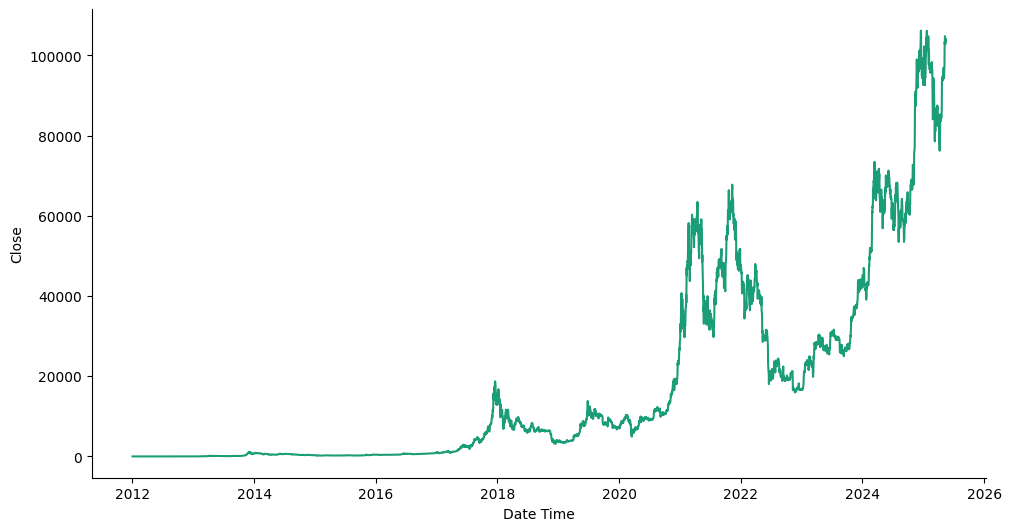

In [18]:
# @title Date Time vs Close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date Time']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = btc_daily.sort_values('Date Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date Time')
_ = plt.ylabel('Close')

Seasonality, Volatility, Non-stationarity

In [19]:
btc_monthly = btc.resample('M').last()
btc_monthly.head()

<ipython-input-19-cc126e4bc562>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  btc_monthly = btc.resample('M').last()


,Date Time,Open,High,Low,Close,Volume
Timestamp,,,,,,
2012-01-31,2012-01-31 23:59:00,5.55,5.55,5.55,5.55,0.0
2012-02-29,2012-02-29 23:59:00,4.99,4.99,4.99,4.99,0.0
2012-03-31,2012-03-31 23:59:00,4.92,4.92,4.92,4.92,0.0
2012-04-30,2012-04-30 23:59:00,5.00,5.00,5.00,5.00,0.0
2012-05-31,2012-05-31 23:59:00,5.14,5.14,5.14,5.14,0.0


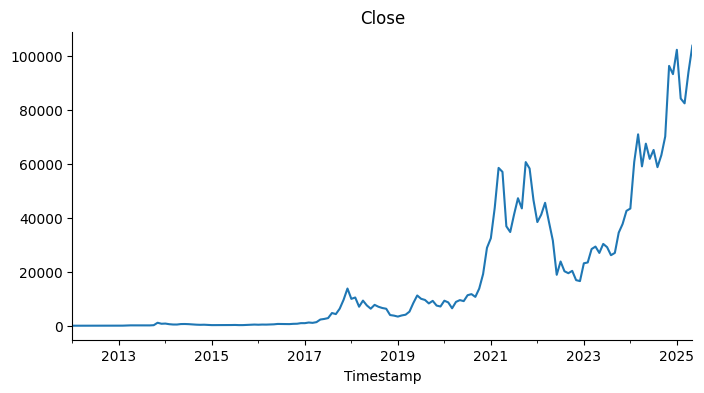

In [20]:
# @title Close

from matplotlib import pyplot as plt
btc_monthly['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [21]:
btc_quarterly = btc.resample('Q').last()
btc_quarterly.head()

<ipython-input-21-cd79414a3a52>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  btc_quarterly = btc.resample('Q').last()


,Date Time,Open,High,Low,Close,Volume
Timestamp,,,,,,
2012-03-31,2012-03-31 23:59:00,4.92,4.92,4.92,4.92,0.0
2012-06-30,2012-06-30 23:59:00,6.54,6.54,6.54,6.54,0.0
2012-09-30,2012-09-30 23:59:00,12.17,12.17,12.17,12.17,0.0
2012-12-31,2012-12-31 23:59:00,13.24,13.24,13.24,13.24,0.0
2013-03-31,2013-03-31 23:59:00,94.08,94.08,94.08,94.08,0.0


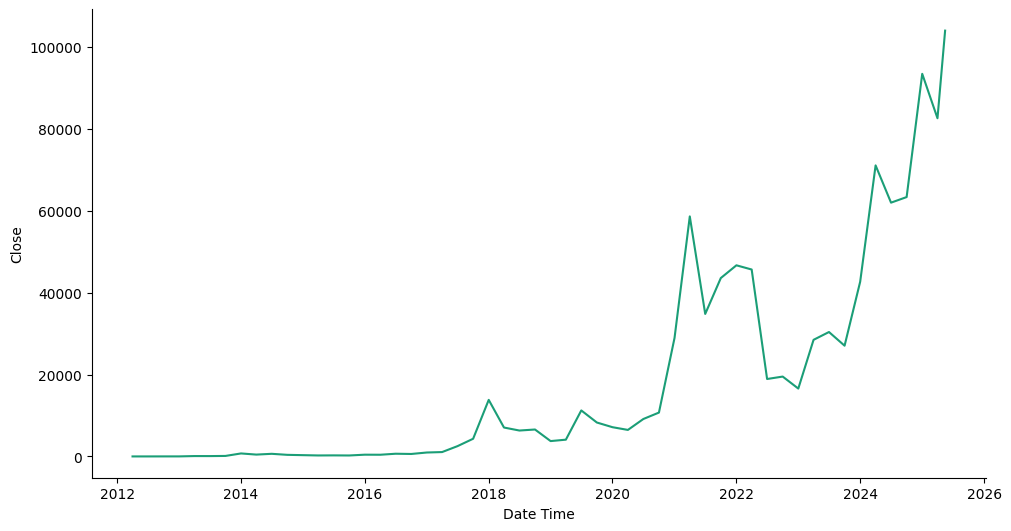

In [22]:
# @title Date Time vs Close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date Time']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = btc_quarterly.sort_values('Date Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date Time')
_ = plt.ylabel('Close')

In [23]:
btc_yearly = btc.resample('Y').last()
btc_yearly.head()

<ipython-input-23-096f83cf74c1>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  btc_yearly = btc.resample('Y').last()


,Date Time,Open,High,Low,Close,Volume
Timestamp,,,,,,
2012-12-31,2012-12-31 23:59:00,13.24,13.24,13.24,13.24,0.000000
2013-12-31,2013-12-31 23:59:00,734.33,734.33,734.33,734.33,1.080320
2014-12-31,2014-12-31 23:59:00,316.67,316.67,316.67,316.67,0.000000
2015-12-31,2015-12-31 23:59:00,430.93,431.28,430.93,431.28,0.136987
2016-12-31,2016-12-31 23:59:00,962.84,963.16,962.84,963.16,5.429433


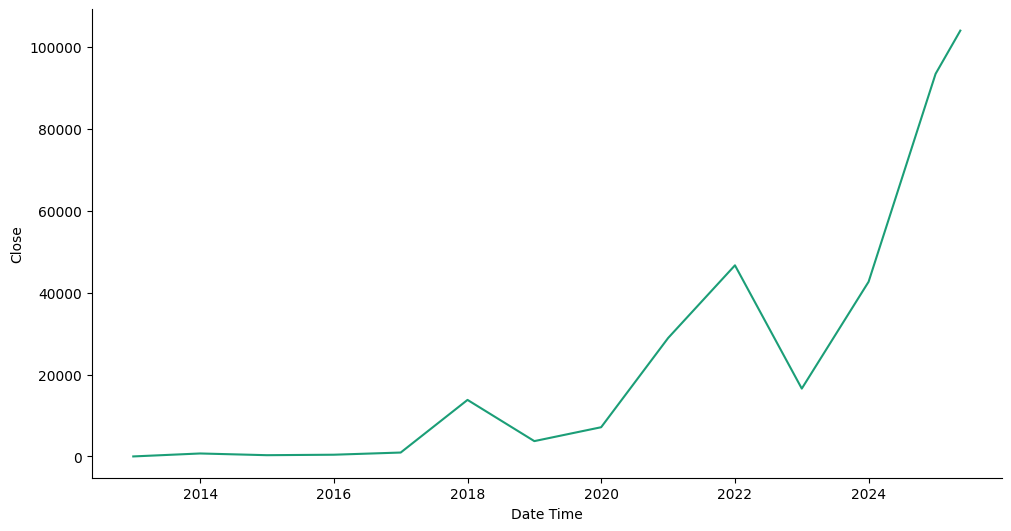

In [24]:
# @title Date Time vs Close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date Time']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = btc_yearly.sort_values('Date Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date Time')
_ = plt.ylabel('Close')

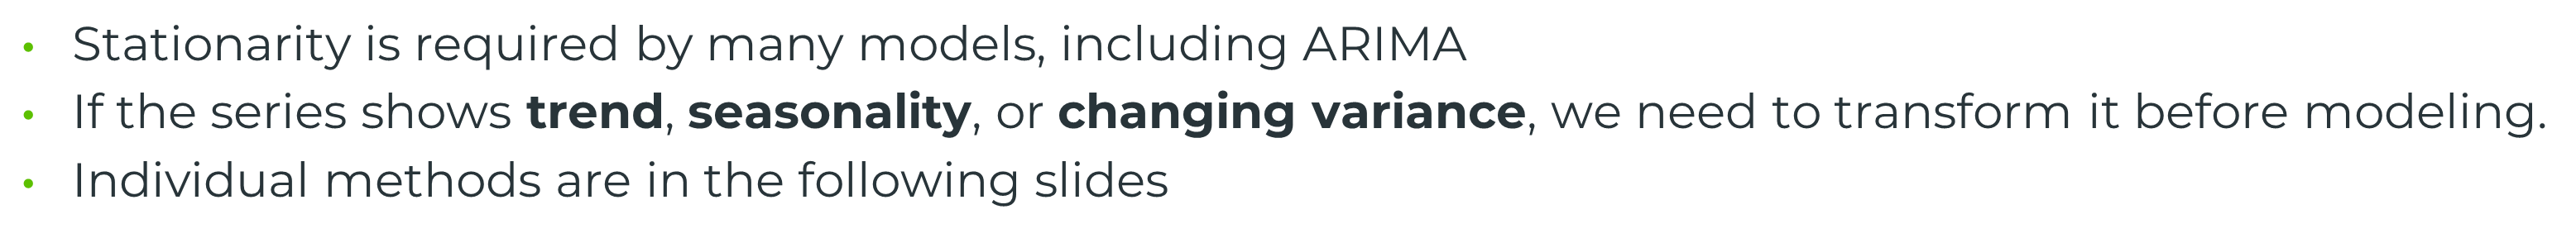

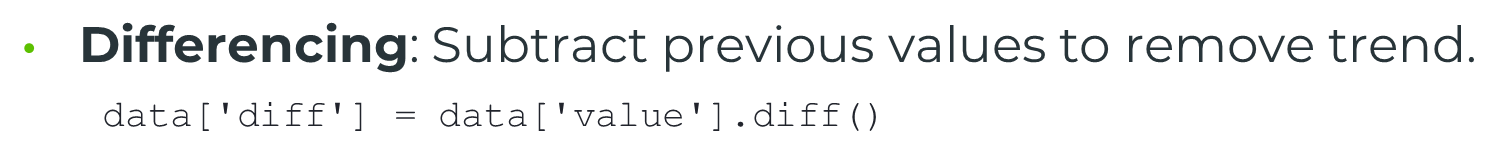

In [25]:
btc['diff'] = btc['Close'].diff()
btc.dropna(inplace=True)

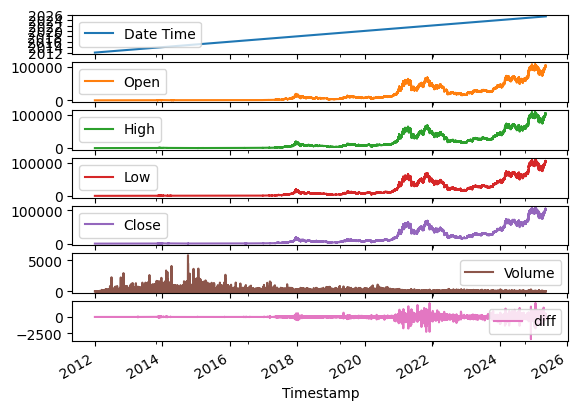

In [26]:
import matplotlib.pyplot as plt
btc.plot(subplots=True)
plt.show()

Seasonal Decomposition is a technique used to separate a time series into several components:

Trend (long-term progression)

Seasonality (repeating short-term cycle)

Residual/Noise (random variation)

You can perform Seasonal Decomposition using seasonal_decompose from statsmodels. Here's how to apply it—especially useful for making non-stationary data more understandable and preparing it for forecasting.

<ipython-input-27-905604ba8f99>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  btc['Close'].interpolate(inplace=True)


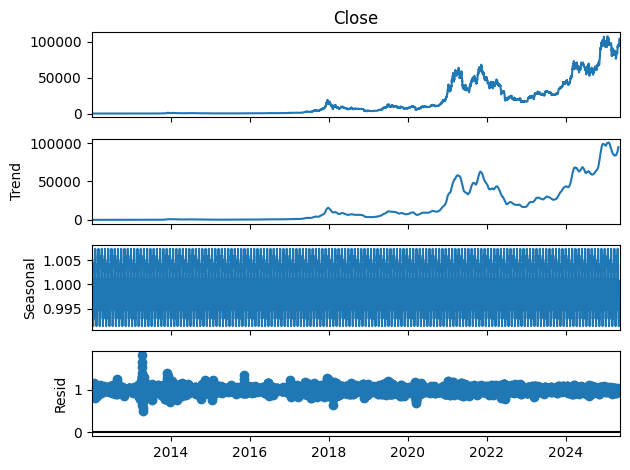

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

btc = btc.asfreq('D')
btc['Close'].interpolate(inplace=True)

result = seasonal_decompose(btc['Close'], model='multiplicative', period=30)

result.plot()
plt.show()

BTC Timeframe in 1 minute is not good for detrending.
Selecting monthly dataset to try it

In [28]:
btc_monthly['Diff'] = btc['Close'].diff()
btc.dropna(inplace=True)

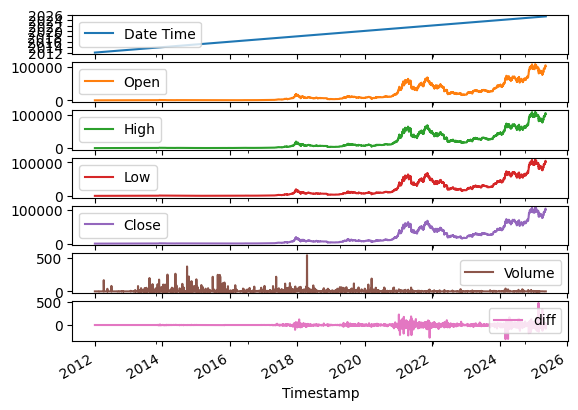

In [29]:
import matplotlib.pyplot as plt
btc.plot(subplots=True)
plt.show()

<ipython-input-30-1cfd2bef0101>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  btc_monthly = btc.asfreq('M')
<ipython-input-30-1cfd2bef0101>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  btc_monthly['Close'].interpolate(inplace=True)


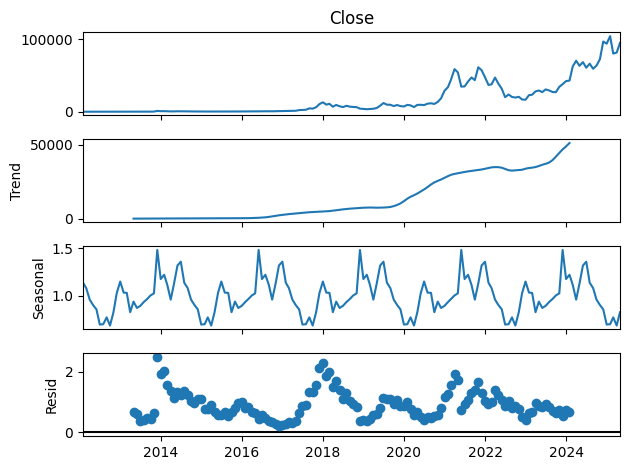

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

btc_monthly = btc.asfreq('M')
btc_monthly['Close'].interpolate(inplace=True)

result = seasonal_decompose(btc_monthly['Close'], model='multiplicative', period=30)

result.plot()
plt.show()

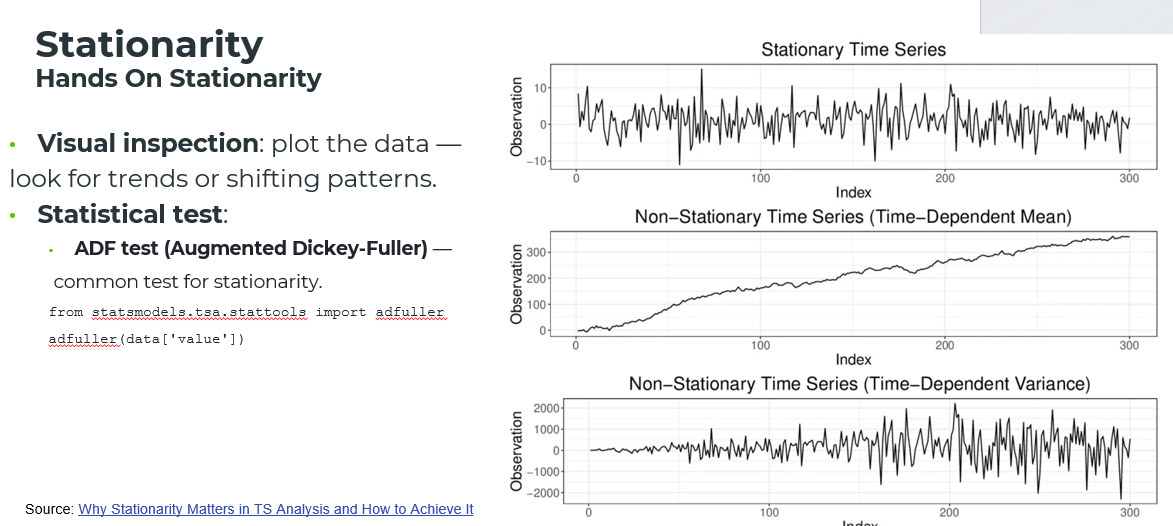

Statistical Test - ADF - to check the residuals.


H0 - The current Monthly Time series has a unit root. It is non-stationary data
H1 - The current Monthly Time Series don't have a unit root. It is stationary

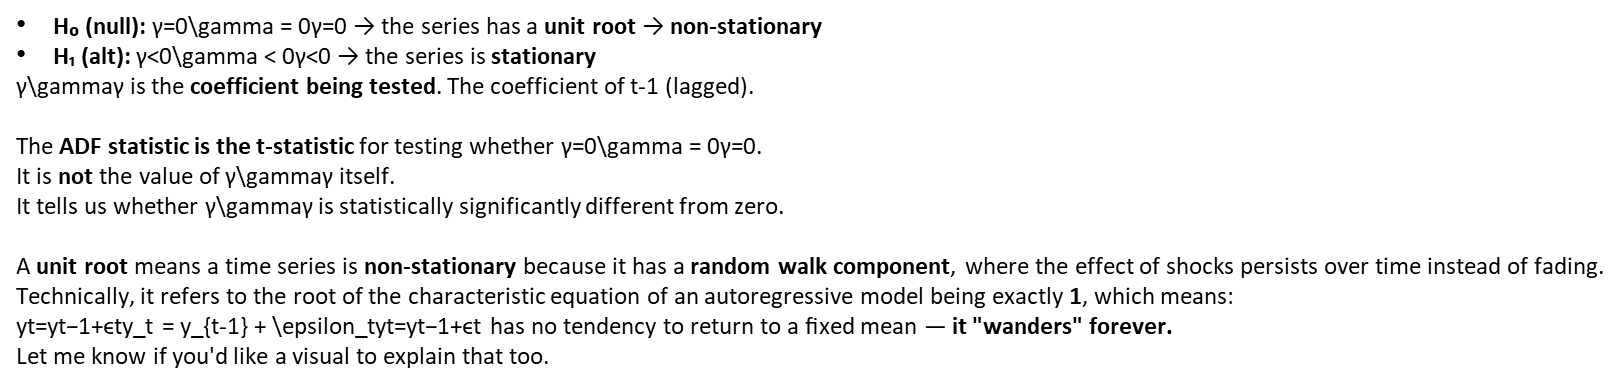

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
adf_result = adfuller(result.resid.dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.46713023583002
p-value: 0.008872493697692177
Critical Values:
   1%: -3.482087964046026
   5%: -2.8842185101614626
   10%: -2.578864381347275


Interpretation of ADF Test

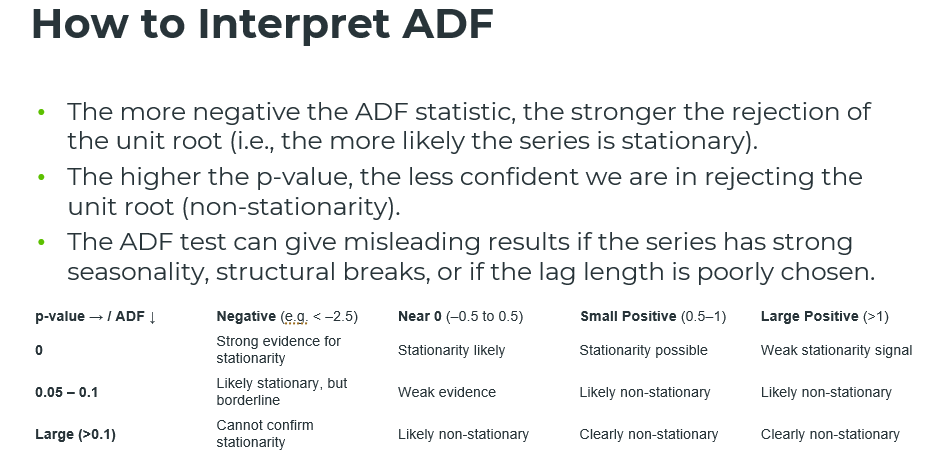

In [33]:
series_name = 'Close'
if adf_result[1] <= 0.05:
    print(
        "The p-value is less than or equal to 0.05, so we reject the null hypothesis."
    )
    print(
        f"This suggests that the {series_name} is likely stationary."
    )  # More specific
else:
    print(
        "The p-value is greater than 0.05, so we fail to reject the null hypothesis."
    )
    print(
        f"This suggests that the {series_name} is likely non-stationary."
    )  # More specific

print(
    "\nNote: The more negative the ADF Statistic, the stronger the rejection of the null hypothesis."
)
print(
    "Compare the ADF Statistic to the Critical Values. If the ADF Statistic is more negative than a critical value,"
    " we reject the null hypothesis at that significance level."
)

The p-value is less than or equal to 0.05, so we reject the null hypothesis.
This suggests that the Close is likely stationary.

Note: The more negative the ADF Statistic, the stronger the rejection of the null hypothesis.
Compare the ADF Statistic to the Critical Values. If the ADF Statistic is more negative than a critical value, we reject the null hypothesis at that significance level.


As our residual part from season decomposing shows seasonality, we will perform next transformation to clear seasonality




Seasonal Differencing

In [34]:
residual_seasonal_diff = result.resid.diff(periods=12).dropna()

In [35]:
adf_result_seasonal_diff = adfuller(residual_seasonal_diff)

In [36]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def interpret_adf_results(adf_result, series_name="Residual"):
    """
    Interprets the results of an Augmented Dickey-Fuller test.

    Args:
        adf_result: The output from the adfuller() function.
        series_name: The name of the time series being tested (for clearer output).
    """
    print(f"\nResults of Augmented Dickey-Fuller Test on {series_name}:")
    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value}")

    print("\nInterpretation:")
    if adf_result[1] <= 0.05:
        print(
            "The p-value is less than or equal to 0.05, so we reject the null hypothesis."
        )
        print(
            f"This suggests that the {series_name} is likely stationary."
        )  # More specific
    else:
        print(
            "The p-value is greater than 0.05, so we fail to reject the null hypothesis."
        )
        print(
            f"This suggests that the {series_name} is likely non-stationary."
        )  # More specific

    print(
        "\nNote: The more negative the ADF Statistic, the stronger the rejection of the null hypothesis."
    )
    print(
        "Compare the ADF Statistic to the Critical Values. If the ADF Statistic is more negative than a critical value,"
        " we reject the null hypothesis at that significance level."
    )

def plot_time_series(series, title="Time Series Plot", ylabel="Value"):
    """
    Plots a time series.

    Args:
        series: A Pandas Series with a DatetimeIndex.
        title: The title of the plot.
        ylabel: The label for the y-axis.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(series, label=ylabel)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


Results of Augmented Dickey-Fuller Test on Seasonally Differenced Residual Series:
ADF Statistic: -2.5713113429063243
p-value: 0.09907276854650382
Critical Values:
   1%: -3.4942202045135513
   5%: -2.889485291005291
   10%: -2.5816762131519275

Interpretation:
The p-value is greater than 0.05, so we fail to reject the null hypothesis.
This suggests that the Seasonally Differenced Residual Series is likely non-stationary.

Note: The more negative the ADF Statistic, the stronger the rejection of the null hypothesis.
Compare the ADF Statistic to the Critical Values. If the ADF Statistic is more negative than a critical value, we reject the null hypothesis at that significance level.


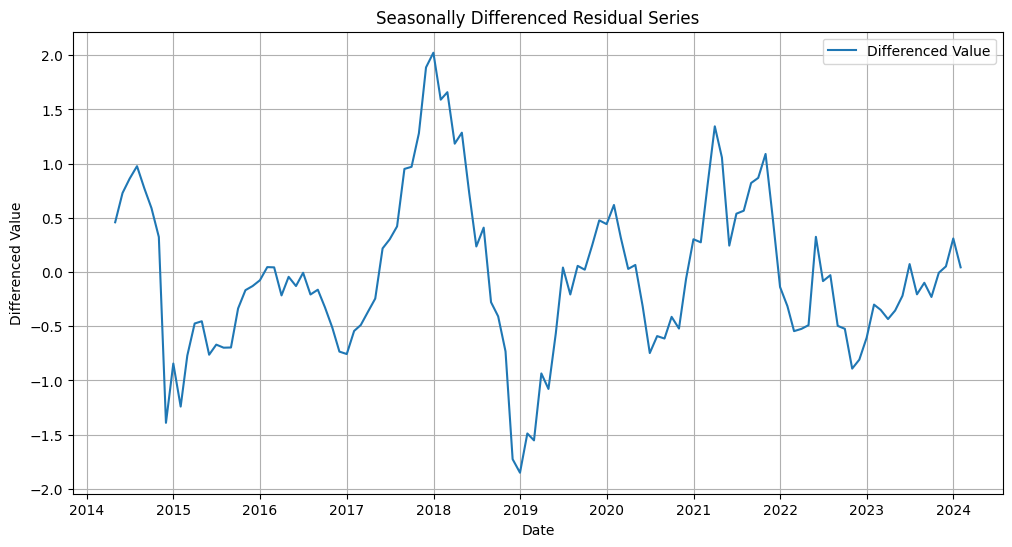

In [37]:
esidual_seasonal_diff = result.resid.diff(periods=12).dropna()
adf_result_seasonal_diff = adfuller(residual_seasonal_diff)
interpret_adf_results(adf_result_seasonal_diff, series_name="Seasonally Differenced Residual Series")
plot_time_series(residual_seasonal_diff, title="Seasonally Differenced Residual Series", ylabel="Differenced Value")

H0 - The current Monthly Time series has a unit root. It is non-stationary data H1 - The current Monthly Time Series don't have a unit root. It is stationary

However, it's not uncommon in time series analysis to proceed with ARIMA modeling even if the stationarity tests are not overwhelmingly conclusive, especially if:

The p-value is close to the significance level.
Visual inspection of the differenced series suggests a reasonable level of stationarity (no obvious trends or strong seasonality remaining).
Further transformations might over-difference the data and introduce noise.
Therefore, we can try to fit an ARIMA model to the seasonally differenced residual series.

We will use Seasonal ARIMA model fitting:
https://otexts.com/fpp2/seasonal-arima.html

ACF/PACF

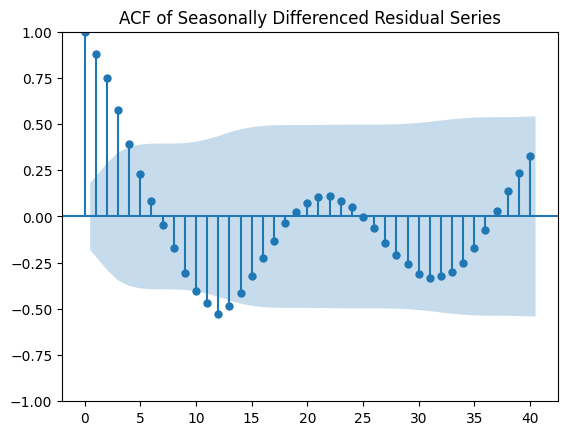

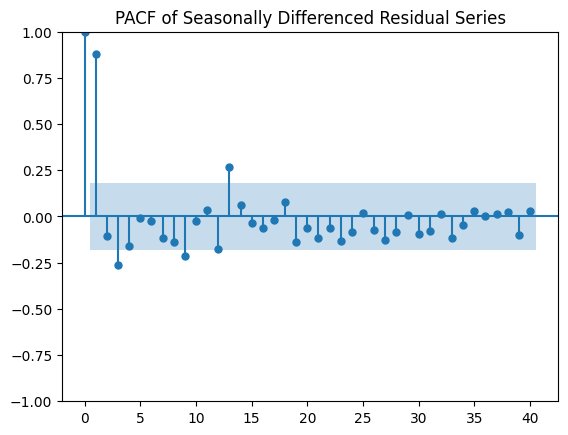

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(residual_seasonal_diff, lags=40)  # Adjust the number of lags as needed
plt.title('ACF of Seasonally Differenced Residual Series')
plt.show()

# Plot PACF
plot_pacf(residual_seasonal_diff, lags=40, method='ywmle')  # Adjust the number of lags
plt.title('PACF of Seasonally Differenced Residual Series')
plt.show()

ARIMA Order (p, d, q)

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  118
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -41.379
Date:                Fri, 16 May 2025   AIC                             90.759
Time:                        17:09:44   BIC                            101.841
Sample:                    04-30-2014   HQIC                            95.259
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0063      0.264     -0.024      0.981      -0.523       0.510
ar.L1          0.8612      0.052     16.649      0.000       0.760       0.963
ma.L1          0.0681      0.100      0.681      0.4

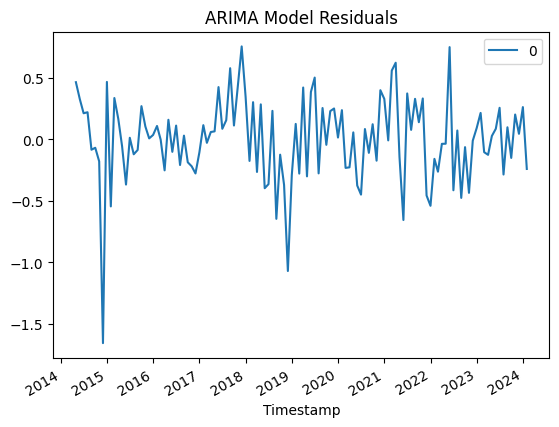

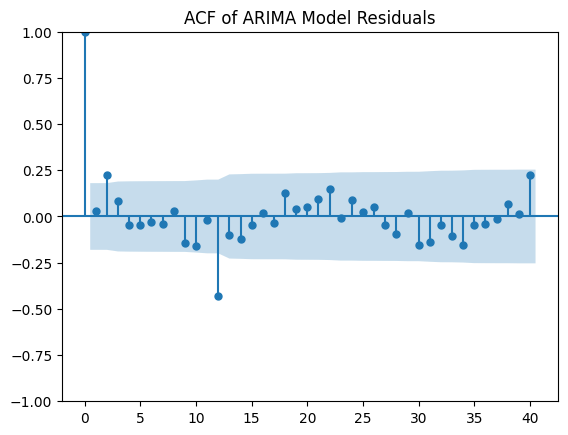

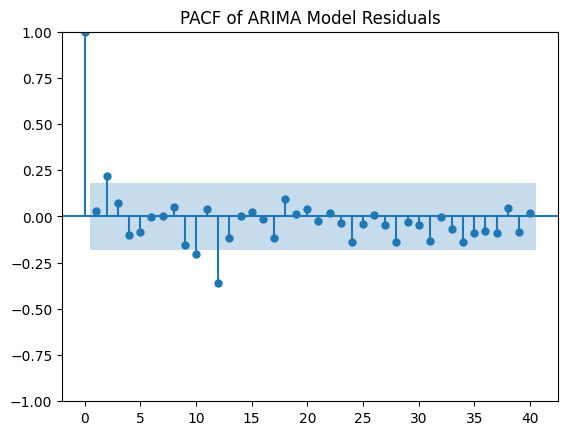

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1, 2, 1) model to the seasonally differenced residuals
model_arima = ARIMA(residual_seasonal_diff, order=(1, 0, 1)) # We use d=0 here as the data is already differenced
results_arima = model_arima.fit()

# Print the model summary
print(results_arima.summary())

# Plot the residuals of the ARIMA model
residuals_arima = pd.DataFrame(results_arima.resid)
residuals_arima.plot(title="ARIMA Model Residuals")
plt.show()

plot_acf(residuals_arima, lags=40, title="ACF of ARIMA Model Residuals")
plt.show()

plot_pacf(residuals_arima, lags=40, method='ywmle', title="PACF of ARIMA Model Residuals")
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  160
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1488.219
Date:                            Fri, 16 May 2025   AIC                           2986.437
Time:                                    17:09:46   BIC                           3001.423
Sample:                                01-31-2012   HQIC                          2992.526
                                     - 04-30-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.010     95.929      0.000       0.980       1.020
ma.L1          0.0512      0.076   

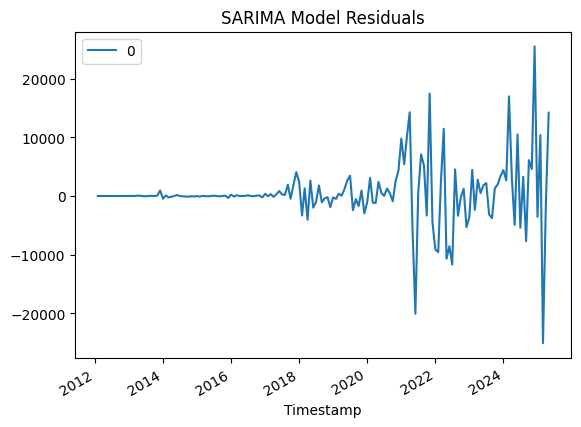

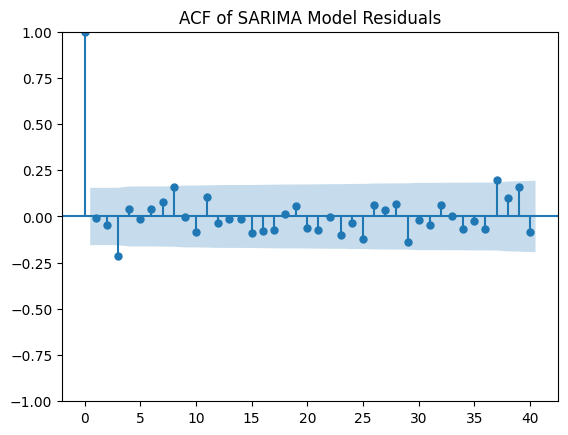

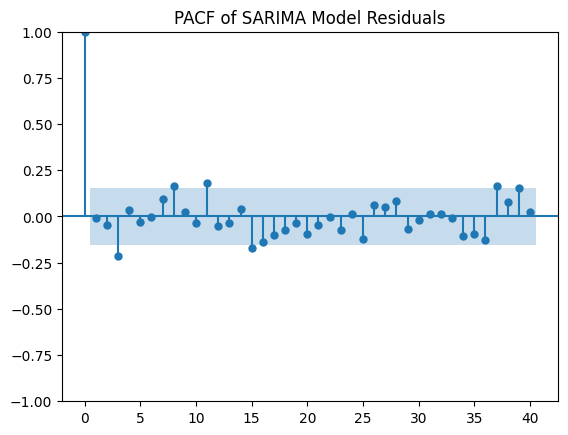

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(1, 0, 1)(1, 1, 1, 12) model to the original 'Close' price (as SARIMA handles differencing)
model_sarima = SARIMAX(btc_monthly['Close'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
results_sarima = model_sarima.fit(disp=False) # disp=False to suppress convergence messages

# Print the model summary
print(results_sarima.summary())

# Plot the residuals of the SARIMA model
residuals_sarima = pd.DataFrame(results_sarima.resid)
residuals_sarima.plot(title="SARIMA Model Residuals")
plt.show()

plot_acf(residuals_sarima, lags=40, title="ACF of SARIMA Model Residuals")
plt.show()

plot_pacf(residuals_sarima, lags=40, method='ywmle', title="PACF of SARIMA Model Residuals")
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv5ufo4x1/h71f43fm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv5ufo4x1/3f7k4afb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9864', 'data', 'file=/tmp/tmpv5ufo4x1/h71f43fm.json', 'init=/tmp/tmpv5ufo4x1/3f7k4afb.json', 'output', 'file=/tmp/tmpv5ufo4x1/prophet_modelb5x75_yo/prophet_model-20250516170948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/p

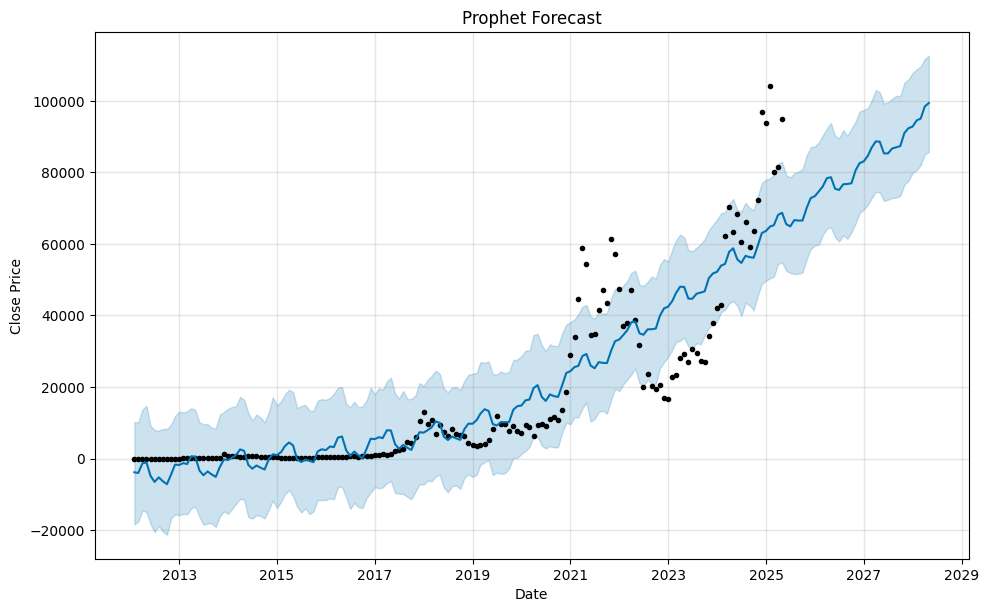

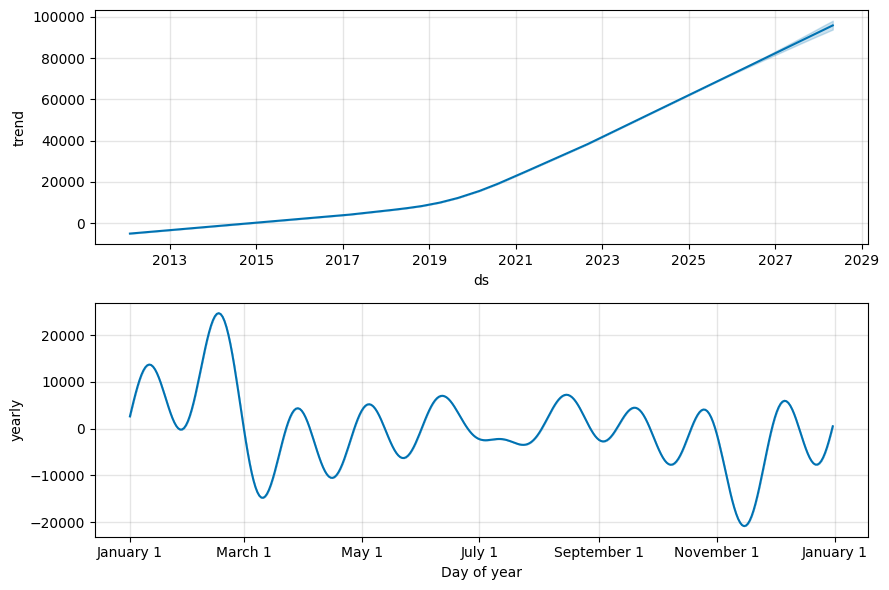

In [41]:
from prophet import Prophet

# Prepare the DataFrame for Prophet
df_prophet = btc_monthly.reset_index()[['Date Time', 'Close']].rename(columns={'Date Time': 'ds', 'Close': 'y'})

# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Create a future dataframe for forecasting (e.g., next 36 months)
future = model_prophet.make_future_dataframe(periods=36, freq='M')

# Make predictions
forecast = model_prophet.predict(future)

# Plot the forecast
fig_prophet = model_prophet.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

fig_components = model_prophet.plot_components(forecast)
plt.show()

Box-Cox lambda: 0.14441514291735322
    trend  predicted_transformed  predicted_original
0     161              29.576419        99746.167599
1     162              29.596723       100131.007584
2     163              29.617027       100517.117224
3     164              29.637331       100904.499997
4     165              29.657635       101293.159392
5     166              29.677939       101683.098904
6     167              29.698244       102074.322034
7     168              29.718548       102466.832294
8     169              29.738852       102860.633201
9     170              29.759156       103255.728281
10    171              29.779460       103652.121068
11    172              29.799764       104049.815101
12    173              29.820068       104448.813931
13    174              29.840373       104849.121112
14    175              29.860677       105250.740210
15    176              29.880981       105653.674796
16    177              29.901285       106057.928450
17    178 

<ipython-input-42-6581c7933b3e>:94: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  extended_index = pd.date_range(btc_monthly.index[-1], periods=37, freq='M') #One extra for the last known


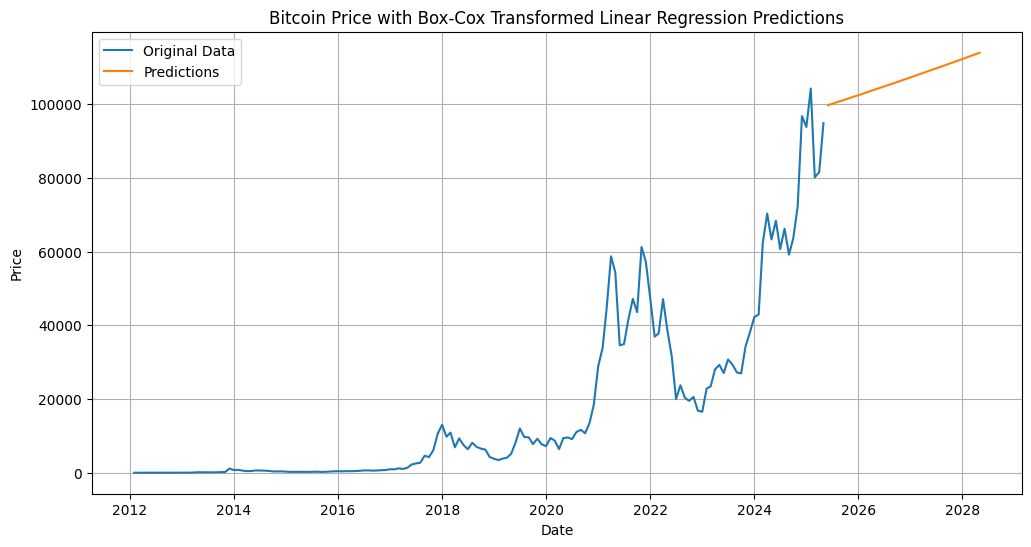

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def boxcox_transform_and_linear_regression(df, target_column='Close', future_periods=30):
    """
    Applies Box-Cox transformation to a target variable, performs linear regression
    with engineered features, and predicts future values.

    Args:
        df (pd.DataFrame): The input DataFrame with time series data.
        target_column (str): The name of the column to predict (e.g., 'Close').
        future_periods (int): Number of future periods to predict.

    Returns:
        pd.DataFrame: DataFrame containing the predictions, including the transformed
                      and inverse-transformed values.  Returns None on error.
    """
    try:
        # 1. Box-Cox Transformation
        y = df[target_column]
        y_no_zeros = y.replace(0, 1e-9)  # Replace 0 with a tiny value to avoid errors
        y_no_negatives = y_no_zeros.abs() #Take absolute value to handle potential negative
        y_transformed, lambda_value = boxcox(y_no_negatives)
        print(f"Box-Cox lambda: {lambda_value}")

        # Create a new DataFrame for the transformed data
        df_transformed = df.copy()
        df_transformed[target_column + '_transformed'] = y_transformed

        # 2. Feature Engineering
        df_transformed['trend'] = range(1, len(df_transformed) + 1)  # Simple trend feature
        # Add more features as needed (e.g., lagged values, seasonality)
        for i in range(1, 4):  # Example: Lagged values
            df_transformed[f'lag_{i}'] = df_transformed[target_column + '_transformed'].shift(i)
        df_transformed.dropna(inplace=True)  # Drop rows with NaN due to lagging

        # 3. Prepare Data for Regression
        X = df_transformed[['trend'] + [f'lag_{i}' for i in range(1, 4)]]  # Include trend and lags
        y = df_transformed[target_column + '_transformed']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Added the split

        # 4. Linear Regression Model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # 5. Create Future Dataframe for Prediction
        last_trend_value = df_transformed['trend'].iloc[-1]
        future_trend = np.arange(last_trend_value + 1, last_trend_value + future_periods + 1)
        future_df = pd.DataFrame({'trend': future_trend})

        # Create lagged features for the future dataframe.  This is tricky,
        # and assumes we can use the last known transformed values as a
        # starting point.  A more sophisticated approach would be to predict
        # the lagged values as well.
        future_df['lag_1'] = df_transformed[target_column + '_transformed'].iloc[-1]
        future_df['lag_2'] = df_transformed[target_column + '_transformed'].iloc[-2]
        future_df['lag_3'] = df_transformed[target_column + '_transformed'].iloc[-3]


        # 6. Make Predictions
        predictions_transformed = model.predict(future_df)

        # 7. Inverse Transform Predictions
        predictions_original = inv_boxcox(predictions_transformed, lambda_value)

        # 8. Create a DataFrame for the results
        predictions_df = pd.DataFrame({
            'trend': future_df['trend'],
            'predicted_transformed': predictions_transformed,
            'predicted_original': predictions_original
        })

        return predictions_df

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Apply the function to your Bitcoin monthly data (btc_monthly)
predictions = boxcox_transform_and_linear_regression(btc_monthly, target_column='Close', future_periods=36)

if predictions is not None:
    print(predictions)

    # Plot the original data and the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(btc_monthly.index, btc_monthly['Close'], label='Original Data')
    #Extend the index to include the prediction period.
    extended_index = pd.date_range(btc_monthly.index[-1], periods=37, freq='M') #One extra for the last known
    plt.plot(extended_index[1:], predictions['predicted_original'], label='Predictions')
    plt.title('Bitcoin Price with Box-Cox Transformed Linear Regression Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

Box-Cox lambda: 0.14441514291735322
    trend  predicted_transformed  predicted_original
0     161              29.576419        99746.167599
1     162              29.596723       100131.007584
2     163              29.617027       100517.117224
3     164              29.637331       100904.499997
4     165              29.657635       101293.159392
5     166              29.677939       101683.098904
6     167              29.698244       102074.322034
7     168              29.718548       102466.832294
8     169              29.738852       102860.633201
9     170              29.759156       103255.728281
10    171              29.779460       103652.121068
11    172              29.799764       104049.815101
12    173              29.820068       104448.813931
13    174              29.840373       104849.121112
14    175              29.860677       105250.740210
15    176              29.880981       105653.674796
16    177              29.901285       106057.928450
17    178 

<ipython-input-43-6581c7933b3e>:94: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  extended_index = pd.date_range(btc_monthly.index[-1], periods=37, freq='M') #One extra for the last known


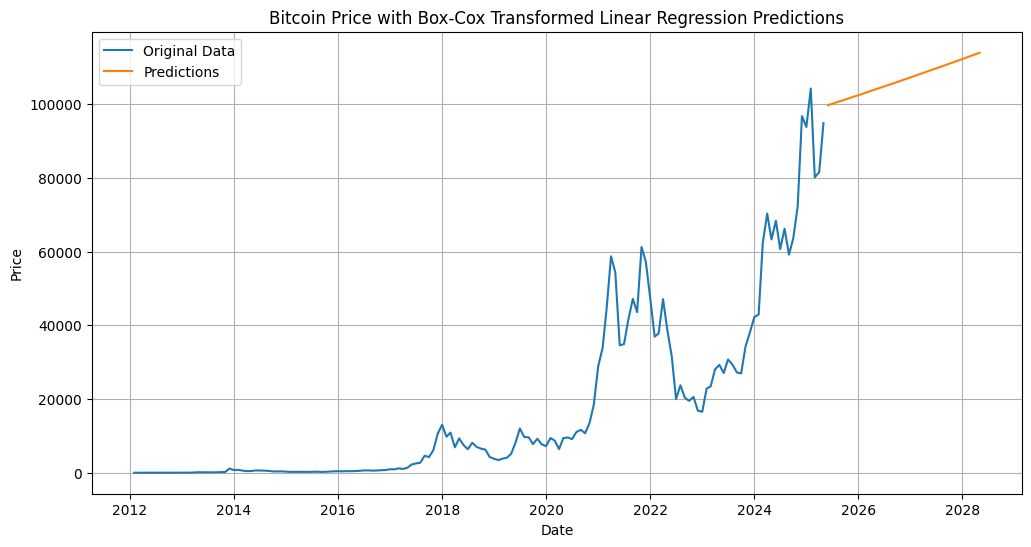

In [43]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def boxcox_transform_and_linear_regression(df, target_column='Close', future_periods=30):
    """
    Applies Box-Cox transformation to a target variable, performs linear regression
    with engineered features, and predicts future values.

    Args:
        df (pd.DataFrame): The input DataFrame with time series data.
        target_column (str): The name of the column to predict (e.g., 'Close').
        future_periods (int): Number of future periods to predict.

    Returns:
        pd.DataFrame: DataFrame containing the predictions, including the transformed
                      and inverse-transformed values.  Returns None on error.
    """
    try:
        # 1. Box-Cox Transformation
        y = df[target_column]
        y_no_zeros = y.replace(0, 1e-9)  # Replace 0 with a tiny value to avoid errors
        y_no_negatives = y_no_zeros.abs() #Take absolute value to handle potential negative
        y_transformed, lambda_value = boxcox(y_no_negatives)
        print(f"Box-Cox lambda: {lambda_value}")

        # Create a new DataFrame for the transformed data
        df_transformed = df.copy()
        df_transformed[target_column + '_transformed'] = y_transformed

        # 2. Feature Engineering
        df_transformed['trend'] = range(1, len(df_transformed) + 1)  # Simple trend feature
        # Add more features as needed (e.g., lagged values, seasonality)
        for i in range(1, 4):  # Example: Lagged values
            df_transformed[f'lag_{i}'] = df_transformed[target_column + '_transformed'].shift(i)
        df_transformed.dropna(inplace=True)  # Drop rows with NaN due to lagging

        # 3. Prepare Data for Regression
        X = df_transformed[['trend'] + [f'lag_{i}' for i in range(1, 4)]]  # Include trend and lags
        y = df_transformed[target_column + '_transformed']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Added the split

        # 4. Linear Regression Model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # 5. Create Future Dataframe for Prediction
        last_trend_value = df_transformed['trend'].iloc[-1]
        future_trend = np.arange(last_trend_value + 1, last_trend_value + future_periods + 1)
        future_df = pd.DataFrame({'trend': future_trend})

        # Create lagged features for the future dataframe.  This is tricky,
        # and assumes we can use the last known transformed values as a
        # starting point.  A more sophisticated approach would be to predict
        # the lagged values as well.
        future_df['lag_1'] = df_transformed[target_column + '_transformed'].iloc[-1]
        future_df['lag_2'] = df_transformed[target_column + '_transformed'].iloc[-2]
        future_df['lag_3'] = df_transformed[target_column + '_transformed'].iloc[-3]


        # 6. Make Predictions
        predictions_transformed = model.predict(future_df)

        # 7. Inverse Transform Predictions
        predictions_original = inv_boxcox(predictions_transformed, lambda_value)

        # 8. Create a DataFrame for the results
        predictions_df = pd.DataFrame({
            'trend': future_df['trend'],
            'predicted_transformed': predictions_transformed,
            'predicted_original': predictions_original
        })

        return predictions_df

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Apply the function to your Bitcoin monthly data (btc_monthly)
predictions = boxcox_transform_and_linear_regression(btc_monthly, target_column='Close', future_periods=36)

if predictions is not None:
    print(predictions)

    # Plot the original data and the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(btc_monthly.index, btc_monthly['Close'], label='Original Data')
    #Extend the index to include the prediction period.
    extended_index = pd.date_range(btc_monthly.index[-1], periods=37, freq='M') #One extra for the last known
    plt.plot(extended_index[1:], predictions['predicted_original'], label='Predictions')
    plt.title('Bitcoin Price with Box-Cox Transformed Linear Regression Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [44]:
!pip install pyaf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 3.9 MB/s eta 0:00:00
